In [7]:
#from google_images_download import google_images_download 
#import keras
#print(keras.__version__)

In [8]:
#response = google_images_download.googleimagesdownload()

In [9]:
#arguments = {"keywords":"pharoah of egypt","limit":10000,"print_urls":True}   #creating list of arguments


In [10]:
#paths = response.download(arguments)   #passing the arguments to the function


In [11]:
#print(paths)

In [12]:
#imp

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import plot_importance
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from sklearn import base
from sklearn.model_selection import KFold
import collections
# Other Libraries
#from imblearn.datasets import fetch_datasets
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm
from sklearn.cluster import KMeans
#import category_encoders as ce
import warnings
import lightgbm as lgb
from pandas import DataFrame
#from geopy.geocoders import Nominatim
#from geopy.distance import vincenty
#from pygeocoder import Geocoder
warnings.filterwarnings("ignore")

C:\Users\Emma\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [14]:
# Dataset directories
#dir_train = 'C:/Users/Emma/Desktop/comp/xente/training.csv'
#dir_test = 'C:/Users/Emma/Desktop/comp/xente/test.csv'
#dir_sub = 'C:/Users/Emma/Desktop/comp/xente/sample_submission.csv'

dir_train = 'C:/Users/Emma/Desktop/desktop/comp/xente/fraud_detection/trainv.csv'
dir_test = 'C:/Users/Emma/Desktop/desktop/comp/xente/fraud_detection/testv.csv'
dir_sub = 'C:/Users/Emma/Desktop/desktop/comp/xente/sample_submission.csv'

In [15]:
#df_train = pd.read_csv(dir_train, low_memory = False)
#df_test = pd.read_csv(dir_test, low_memory = False)
#df_sub = pd.read_csv(dir_sub, low_memory = False)

df_train = pd.read_csv(dir_train, low_memory = False)
df_test = pd.read_csv(dir_test, low_memory = False)
df_sub = pd.read_csv(dir_sub, low_memory = False)


In [16]:
df_train.head()

,BatchId,AccountId,CustomerId,CurrencyCode,CountryCode,Amount,Value,PricingStrategy,ProviderId_0,ProviderId_1,...,ProductId_25,ChannelId_0,ChannelId_1,ChannelId_2,ChannelId_3,ChannelId_4,hour,minute,day,period
0,46980,2490,2584,0,0,1000.0,7.968962,2,0,0,...,0,0,0,1,0,0,2,18,3,1
1,31755,3219,2584,0,0,20.0,3.184730,2,0,0,...,0,0,1,0,0,0,2,19,3,1
2,60272,2713,2806,0,0,500.0,7.065185,2,0,0,...,0,0,0,1,0,0,2,44,3,1
3,1797,3351,3733,0,0,20000.0,12.308762,2,1,0,...,0,0,0,1,0,0,3,32,3,1
4,48941,3219,3733,0,0,644.0,7.392252,2,0,0,...,0,0,1,0,0,0,3,34,3,1


In [17]:
#dfsub = df_train.fillna(1)
df_train['CustomerId'].unique()

array([2584, 2806, 3733, ..., 3665, 1354,  761], dtype=int64)

In [1]:
df_train.shape

NameError: name 'df_train' is not defined

In [11]:
#dfsub.to_csv('dfssfr.csv', index=False)

In [12]:
#df_test['FraudResult'] = df_test.AccountId.map(df_train.set_index('AccountId')['FraudResult'].to_dict())

In [13]:
#df_test.to_csv('dftesfrx.csv', index=False)

In [14]:
#search for values in test dataframe and not in clean dataframe
#db  = df_test["AccountId"][df_test["AccountId"].isin(df_train["AccountId"])]
#db.unique()

In [15]:
#db.describe()

In [16]:
#db.to_csv('db.csv', index=False)

In [7]:
df_train.drop(['CurrencyCode', 'CountryCode'], axis = 1, inplace = True)
df_test.drop(['CurrencyCode', 'CountryCode'], axis = 1, inplace = True)

In [8]:
df_train["TransactionStartTime"] = pd.to_datetime(df_train.TransactionStartTime, errors='coerce')

df_test["TransactionStartTime"] = pd.to_datetime(df_test.TransactionStartTime, errors='coerce')

In [9]:
def  time_features(x): 
    x["date"]=pd.to_datetime(x["TransactionStartTime"],format='%Y-%m-%d %H:%M:%S')
    x["dayofweek"]=x["TransactionStartTime"].dt.dayofweek
    x["dayofyear"]=x["TransactionStartTime"].dt.dayofyear
    x["dayofmonth"]=x["TransactionStartTime"].dt.day
    x["year_woy"]=x["TransactionStartTime"].dt.year.astype(str)+x["TransactionStartTime"].dt.weekofyear.astype(str)
    x["hour"]=x["TransactionStartTime"].dt.hour
    x["minute"]=x["TransactionStartTime"].dt.minute
    x["is_weekend"]=x["dayofweek"].apply( lambda x : 1 if x  in [5,6] else 0 )
    x["year"]=x["TransactionStartTime"].dt.year
    x["quarter"]=x["TransactionStartTime"].dt.quarter
    x["month"]=x["TransactionStartTime"].dt.month
   # x['week_of_year']=x["TransactionStartTime"].dt.weekofyear
    

    return x 
train=time_features(df_train)

In [10]:
def  time_features(x): 
    x["date"]=pd.to_datetime(x["TransactionStartTime"],format='%Y-%m-%d %H:%M:%S')
    x["dayofweek"]=x["TransactionStartTime"].dt.dayofweek
    x["hour"]=x["TransactionStartTime"].dt.hour
    x["minute"]=x["TransactionStartTime"].dt.minute
    x["dayofyear"]=x["TransactionStartTime"].dt.dayofyear
    x["dayofmonth"]=x["TransactionStartTime"].dt.day
    x["is_weekend"]=x["dayofweek"].apply( lambda x : 1 if x  in [5,6] else 0 )
    x["year_woy"]=x["TransactionStartTime"].dt.year.astype(str)+x["TransactionStartTime"].dt.weekofyear.astype(str)
    x["year"]=x["TransactionStartTime"].dt.year
    x["quarter"]=x["TransactionStartTime"].dt.quarter
    x["month"]=x["TransactionStartTime"].dt.month
   # x['week_of_year']=x["TransactionStartTime"].dt.weekofyear
    return x 
test=time_features(df_test)

In [11]:
df_train.head(1)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,...,dayofweek,dayofyear,dayofmonth,year_woy,hour,minute,is_weekend,year,quarter,month
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,...,3,319,15,201846,2,18,0,2018,4,11


In [13]:
'''df_train.drop(['is_weekend', 'BatchId', 'month', 'TransactionId', 'hour', 'Amount', 'AccountId',
           'year', 'SubscriptionId', 'ProductId', 'ProductCategory',
          'ChannelId', 'quarter'], axis = 1, inplace = True)
df_test.drop(['is_weekend', 'BatchId', 'month', 'TransactionId', 'hour', 'Amount', 'AccountId',
           'year', 'SubscriptionId', 'ProductId', 'ProductCategory',
          'ChannelId', 'quarter'], axis = 1, inplace = True)'''

"df_train.drop(['is_weekend', 'BatchId', 'month', 'TransactionId', 'hour', 'Amount', 'AccountId',\n           'year', 'SubscriptionId', 'ProductId', 'ProductCategory',\n          'ChannelId', 'quarter'], axis = 1, inplace = True)\ndf_test.drop(['is_weekend', 'BatchId', 'month', 'TransactionId', 'hour', 'Amount', 'AccountId',\n           'year', 'SubscriptionId', 'ProductId', 'ProductCategory',\n          'ChannelId', 'quarter'], axis = 1, inplace = True)"

In [14]:
df_train.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
       'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'date', 'dayofweek', 'dayofyear', 'dayofmonth', 'year_woy', 'hour',
       'minute', 'is_weekend', 'year', 'quarter', 'month'],
      dtype='object')

In [15]:
df_test.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount',
       'Value', 'TransactionStartTime', 'PricingStrategy', 'date', 'dayofweek',
       'hour', 'minute', 'dayofyear', 'dayofmonth', 'is_weekend', 'year_woy',
       'year', 'quarter', 'month'],
      dtype='object')

In [17]:
'''df_train = df_train.drop('FraudResult', axis = 1)
df_test = df_test.drop('FraudResult', axis = 1)'''

"df_train = df_train.drop('FraudResult', axis = 1)\ndf_test = df_test.drop('FraudResult', axis = 1)"

In [18]:
#categorical_features_indices = [2,3,4,5,6,7,8,9]
'''df_train.to_csv('xtrainz.csv', index=False)
df_test.to_csv('xtestz.csv', index=False)'''

"df_train.to_csv('xtrainz.csv', index=False)\ndf_test.to_csv('xtestz.csv', index=False)"

In [28]:
df_train.dtypes

TransactionId                   object
BatchId                         object
AccountId                       object
SubscriptionId                  object
CustomerId                      object
ProviderId                      object
ProductId                       object
ProductCategory                 object
ChannelId                       object
Amount                         float64
Value                            int64
TransactionStartTime    datetime64[ns]
PricingStrategy                  int64
FraudResult                      int64
date                    datetime64[ns]
dayofweek                        int64
dayofyear                        int64
dayofmonth                       int64
year_woy                        object
hour                             int64
minute                           int64
is_weekend                       int64
year                             int64
quarter                          int64
month                            int64
dtype: object

In [24]:
df_train.drop(['TransactionStartTime', 'date'], axis = 1, inplace = True)
df_test.drop(['TransactionStartTime', 'date'], axis = 1, inplace = True)

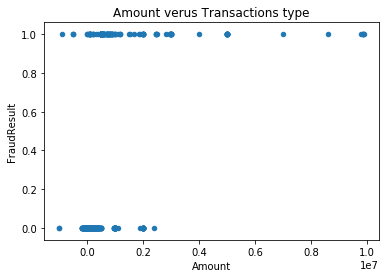

In [30]:
# lets plot plain scatter plot considering Amount and Class
df_train.plot(kind='scatter', x='Amount', y='FraudResult',title ='Amount verus Transactions type');
plt.show()

In [ ]:
df_train.head(1)

In [31]:
cat_cols = ['AccountId', 'SubscriptionId', 'CustomerId','ProviderId', 'ProductId','ProductCategory', 
            'ChannelId', 'year_woy', 'TransactionId', 'BatchId']

In [32]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [33]:
print(df_train.shape, df_test.shape)

(95662, 23) (45019, 22)


# frequency encoding

In [34]:
#columns = list(df_train.columns)
def frequency_encoding(frame, col):
    freq_encoding = frame.groupby([col]).size()/frame.shape[0] 
    freq_encoding = freq_encoding.reset_index().rename(columns={0:'{}_Frequency'.format(col)})
    return frame.merge(freq_encoding, on=col, how='left')


In [35]:
len_train = df_train.shape[0]
df_all = pd.concat([df_train, df_test])

for col in tqdm(cat_cols):
    df_all = frequency_encoding(df_all, col)

df_train = df_all[:len_train]
df_test = df_all[len_train:]

print(df_train.shape, df_test.shape)

100%|██████████████████████████████████████████| 10/10 [00:08<00:00,  1.19s/it]


(95662, 33) (45019, 33)


In [36]:
df_train.drop(cat_cols, axis=1, inplace=True)
df_test.drop(cat_cols, axis=1, inplace=True)

freq_cat_cols = ['{}_Frequency'.format(col) for col in cat_cols]

# end of frequency encode

# beginnig of mean encoding

# end of mean encoding

In [19]:
df_train.columns

Index(['BatchId', 'AccountId', 'CustomerId', 'CurrencyCode', 'CountryCode',
       'Amount', 'Value', 'PricingStrategy', 'ProviderId_0', 'ProviderId_1',
       'ProviderId_2', 'ProviderId_3', 'ProviderId_4', 'ProviderId_5',
       'ProductCategory_0', 'ProductCategory_1', 'ProductCategory_2',
       'ProductCategory_3', 'ProductCategory_4', 'ProductCategory_5',
       'ProductCategory_6', 'ProductCategory_7', 'ProductCategory_8',
       'ProductId_0', 'ProductId_1', 'ProductId_2', 'ProductId_3',
       'ProductId_4', 'ProductId_5', 'ProductId_6', 'ProductId_7',
       'ProductId_8', 'ProductId_9', 'ProductId_10', 'ProductId_11',
       'ProductId_12', 'ProductId_13', 'ProductId_14', 'ProductId_15',
       'ProductId_16', 'ProductId_17', 'ProductId_18', 'ProductId_19',
       'ProductId_20', 'ProductId_21', 'ProductId_22', 'ProductId_23',
       'ProductId_24', 'ProductId_25', 'ChannelId_0', 'ChannelId_1',
       'ChannelId_2', 'ChannelId_3', 'ChannelId_4', 'hour', 'minute', 'day',
    

In [18]:
y = df_train.FraudResult
df_train = df_train.drop('FraudResult', axis = 1)

AttributeError: 'DataFrame' object has no attribute 'FraudResult'

In [38]:
df_test = df_test[df_train.columns]
#df_train.to_csv('trainx.csv', index=False)
#df_test.to_csv('testx.csv', index=False)

In [39]:
#rob_scaler = RobustScaler()
#sc = StandardScaler()
#df_train = pd.DataFrame(rob_scaler.fit_transform(df_train), columns = df_train.columns)
#df_test = pd.DataFrame(rob_scaler.transform(df_test), columns = df_test.columns)

In [40]:
X = df_train

In [41]:
xgb = XGBClassifier()
xgb.fit(X, y)
sorted_idx = np.argsort(xgb.feature_importances_)[::-1]
for index in sorted_idx:
    print([X.columns[index], xgb.feature_importances_[index]])

['Value', 0.28280962]
['Amount', 0.2809612]
['dayofmonth', 0.072088726]
['dayofyear', 0.0702403]
['year_woy_Frequency', 0.06654344]
['CustomerId_Frequency', 0.06469501]
['ProviderId_Frequency', 0.051756006]
['AccountId_Frequency', 0.04436229]
['minute', 0.029574862]
['dayofweek', 0.018484289]
['hour', 0.012939001]
['PricingStrategy', 0.0055452865]
['is_weekend', 0.0]
['BatchId_Frequency', 0.0]
['month', 0.0]
['TransactionId_Frequency', 0.0]
['year', 0.0]
['SubscriptionId_Frequency', 0.0]
['ProductId_Frequency', 0.0]
['ProductCategory_Frequency', 0.0]
['ChannelId_Frequency', 0.0]
['quarter', 0.0]


In [42]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,Amount,PricingStrategy,Value,dayofmonth,dayofweek,dayofyear,hour,is_weekend,minute,month,quarter,year,AccountId_Frequency,SubscriptionId_Frequency,CustomerId_Frequency,ProviderId_Frequency,ProductId_Frequency,ProductCategory_Frequency,ChannelId_Frequency,year_woy_Frequency,TransactionId_Frequency,BatchId_Frequency
Amount,1,-0.0619308,0.989692,-0.00390455,0.00424078,-0.00912468,-0.00161093,0.00382488,0.00141559,-0.00906017,-0.0107383,0.0107383,-0.0463649,-0.047349,-0.0581813,-0.110752,-0.0644761,-0.0177455,0.0641177,0.0144781,-1.27638e-14,0.0045269
PricingStrategy,-0.0619308,1,-0.0170198,-0.131597,-0.122899,-0.0383209,0.00742317,-0.0671655,-0.0107459,-0.0312905,-0.0297569,0.0297569,-0.223265,-0.234118,0.391865,-0.173547,-0.101417,0.0344697,-0.0553143,0.015554,1.08238e-14,-0.0364235
Value,0.989692,-0.0170198,1,-0.0241035,-0.0137586,-0.0116405,0.000473952,-0.00799737,-0.000595701,-0.0104516,-0.0120013,0.0120013,-0.0502454,-0.0519525,0.0120985,-0.0926151,-0.06275,-0.0159313,0.0343117,0.0183664,-7.14676e-16,0.00304064
dayofmonth,-0.00390455,-0.131597,-0.0241035,1,0.0225208,0.260488,-0.0194641,-0.00218386,-0.00221546,0.207837,0.247493,-0.247493,0.0655304,0.0665087,-0.172351,-0.00399449,0.0398336,-0.00698772,0.022736,-0.0132848,-6.53009e-14,0.00910791
dayofweek,0.00424078,-0.122899,-0.0137586,0.0225208,1,0.0266465,-0.00434546,0.678937,-0.00268454,0.0256458,0.0228209,-0.0228209,0.00663679,0.0147243,-0.194545,-0.0399471,0.00542689,-0.00678669,0.0802663,-0.0751269,4.50063e-14,-0.017194
dayofyear,-0.00912468,-0.0383209,-0.0116405,0.260488,0.0266465,1,0.010964,0.0327122,0.000557018,0.998532,0.996955,-0.996955,0.0632352,0.0589732,0.0411102,0.047874,0.0526954,-0.0119578,-0.0436883,-0.177463,7.13748e-13,0.0266306
hour,-0.00161093,0.00742317,0.000473952,-0.0194641,-0.00434546,0.010964,1,0.019099,-0.0598579,0.0122412,0.00962096,-0.00962096,-0.00701626,-0.00378205,0.042211,0.00207236,-0.00868552,-0.0077516,-0.00210322,0.00349402,-6.61449e-15,0.00607779
is_weekend,0.00382488,-0.0671655,-0.00799737,-0.00218386,0.678937,0.0327122,0.019099,1,-0.00338313,0.0332544,0.0292354,-0.0292354,-0.000814203,-0.00547327,-0.0476475,0.0145653,-4.50388e-06,-0.0103421,0.0483382,-0.0469665,1.15306e-14,-0.00654465
minute,0.00141559,-0.0107459,-0.000595701,-0.00221546,-0.00268454,0.000557018,-0.0598579,-0.00338313,1,0.000673559,0.000711678,-0.000711678,0.00173427,0.00224406,-0.0128623,-0.00119548,0.00279401,-0.00173979,0.00216388,-0.0032974,-3.84612e-15,-0.00266392
month,-0.00906017,-0.0312905,-0.0104516,0.207837,0.0256458,0.998532,0.0122412,0.0332544,0.000673559,1,0.996205,-0.996205,0.0603351,0.0559687,0.0516151,0.0487599,0.0511209,-0.011744,-0.045599,-0.179039,5.8499e-13,0.0264828


In [43]:
X.drop(['is_weekend', 'BatchId_Frequency', 'month', 'TransactionId_Frequency', 'hour', 'Amount', 'AccountId_Frequency',
           'year', 'SubscriptionId_Frequency', 'ProductId_Frequency', 'ProductCategory_Frequency',
          'ChannelId_Frequency', 'quarter'], axis = 1, inplace = True)
df_test.drop(['is_weekend', 'BatchId_Frequency', 'month', 'TransactionId_Frequency', 'hour', 'Amount', 'AccountId_Frequency',
             'year', 'SubscriptionId_Frequency', 'ProductId_Frequency', 'ProductCategory_Frequency',
          'ChannelId_Frequency', 'quarter'], axis = 1, inplace = True)

In [44]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,PricingStrategy,Value,dayofmonth,dayofweek,dayofyear,minute,CustomerId_Frequency,ProviderId_Frequency,year_woy_Frequency
PricingStrategy,1,-0.0170198,-0.131597,-0.122899,-0.0383209,-0.0107459,0.391865,-0.173547,0.015554
Value,-0.0170198,1,-0.0241035,-0.0137586,-0.0116405,-0.000595701,0.0120985,-0.0926151,0.0183664
dayofmonth,-0.131597,-0.0241035,1,0.0225208,0.260488,-0.00221546,-0.172351,-0.00399449,-0.0132848
dayofweek,-0.122899,-0.0137586,0.0225208,1,0.0266465,-0.00268454,-0.194545,-0.0399471,-0.0751269
dayofyear,-0.0383209,-0.0116405,0.260488,0.0266465,1,0.000557018,0.0411102,0.047874,-0.177463
minute,-0.0107459,-0.000595701,-0.00221546,-0.00268454,0.000557018,1,-0.0128623,-0.00119548,-0.0032974
CustomerId_Frequency,0.391865,0.0120985,-0.172351,-0.194545,0.0411102,-0.0128623,1,0.218055,0.0692089
ProviderId_Frequency,-0.173547,-0.0926151,-0.00399449,-0.0399471,0.047874,-0.00119548,0.218055,1,0.0330412
year_woy_Frequency,0.015554,0.0183664,-0.0132848,-0.0751269,-0.177463,-0.0032974,0.0692089,0.0330412,1


In [45]:
SEED = 222

np.random.seed(SEED)

In [46]:
X.head(1)

,PricingStrategy,Value,dayofmonth,dayofweek,dayofyear,minute,CustomerId_Frequency,ProviderId_Frequency,year_woy_Frequency
0,2,1000,15,3,319,18,0.00108,0.355464,0.021922


In [47]:
X.head(1)

,PricingStrategy,Value,dayofmonth,dayofweek,dayofyear,minute,CustomerId_Frequency,ProviderId_Frequency,year_woy_Frequency
0,2,1000,15,3,319,18,0.00108,0.355464,0.021922


In [48]:
X.columns

Index(['PricingStrategy', 'Value', 'dayofmonth', 'dayofweek', 'dayofyear',
       'minute', 'CustomerId_Frequency', 'ProviderId_Frequency',
       'year_woy_Frequency'],
      dtype='object')

In [49]:
#X.to_csv('xtrainz.csv', index=False)
#df_test.to_csv('xtestz.csv', index=False)


In [50]:
#y.to_csv('label.csv', index=False)

In [44]:
#os = SMOTE(random_state=0)
#X, y = os.fit_sample(X, y)
#df_test = df_test.values
#X = pd.DataFrame(X)
#df_test = pd.DataFrame(df_test)
#y = pd.DataFrame(y)
#df_test = df_test[X.columns]
#params = {"max_depth": 2, "learning_rate" : 0.01, "num_leaves": 100,  "objective": "binary", #"num_class": num_of_classes,
#          "n_estimators": 500, "boosting_type": "dart"}
#X = X.values
#y = y.values
#df_test = df_test.values

In [45]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
import numpy as np

RANDOM_SEED = 42

'''clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
       n_jobs=1, nthread=None, random_state=RANDOM_SEED,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)
clf3 = GaussianNB()
lr = LogisticRegression()

# The StackingCVClassifier uses scikit-learn's check_cv
# internally, which doesn't support a random seed. Thus
# NumPy's random seed need to be specified explicitely for
# deterministic behavior
np.random.seed(RANDOM_SEED)
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3], 
                            meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))'''


'clf1 = KNeighborsClassifier(n_neighbors=1)\nclf2 = XGBClassifier(base_score=0.5, booster=\'gbtree\', colsample_bylevel=1,\n       colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_delta_step=0,\n       max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,\n       n_jobs=1, nthread=None, random_state=RANDOM_SEED,\n       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,\n       silent=True, subsample=0.8)\nclf3 = GaussianNB()\nlr = LogisticRegression()\n\n# The StackingCVClassifier uses scikit-learn\'s check_cv\n# internally, which doesn\'t support a random seed. Thus\n# NumPy\'s random seed need to be specified explicitely for\n# deterministic behavior\nnp.random.seed(RANDOM_SEED)\nsclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3], \n                            meta_classifier=lr)\n\nprint(\'3-fold cross validation:\n\')\n\nfor clf, label in zip([clf1, clf2, clf3, sclf], \n                      [\'KNN\', \n                       \'Random Forest\', \

In [46]:
'''import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingCVClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)
plt.show()'''

"import matplotlib.pyplot as plt\nfrom mlxtend.plotting import plot_decision_regions\nimport matplotlib.gridspec as gridspec\nimport itertools\n\ngs = gridspec.GridSpec(2, 2)\n\nfig = plt.figure(figsize=(10,8))\n\nfor clf, lab, grd in zip([clf1, clf2, clf3, sclf], \n                         ['KNN', \n                          'Random Forest', \n                          'Naive Bayes',\n                          'StackingCVClassifier'],\n                          itertools.product([0, 1], repeat=2)):\n\n    clf.fit(X, y)\n    ax = plt.subplot(gs[grd[0], grd[1]])\n    fig = plot_decision_regions(X=X, y=y, clf=clf)\n    plt.title(lab)\nplt.show()"

In [47]:
#sclf = sclf.fit(X, y)
#y_predx = sclf.predict(df_test)
#y = y.astype(np.integer)

In [48]:
#X = pd.DataFrame(X)
#df_test = pd.DataFrame(df_test)
#y = pd.DataFrame(y)

In [49]:
#gs = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#    colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_delta_step=0,
#    max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
#    n_jobs=1, nthread=None, random_state=0,
#    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#    silent=True, subsample=0.8)

In [50]:
'''kf = RepeatedStratifiedKFold(n_splits=3, random_state=1, n_repeats=3)
pred_test_full = 0
cv_score = []
i = 1
for train_index, test_index in kf.split(X,y):
    #pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), gs)
    print('\n{} of KFold {}'.format(i,5))
    Xtr, Xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    #print(Xtr.head(1))
    #Xtr = pd.DataFrame(Xtr)
    #ytr = pd.DataFrame(ytr)
    #Xvl = pd.DataFrame(Xvl)
    #yvl = pd.DataFrame(yvl)
    #Xvl = Xvl[Xtr.columns]
    d_train = lgb.Dataset(Xtr, label=ytr) 
    params = {"max_depth": 3, "learning_rate" : 0.1, "num_leaves": 900,
              "n_estimators": 400, "boosting": "dart", "application": "binary", "min_data_in_leaf": 20,
              "num_leaves": 41,  "drop_rate": 0.15} 
    gs = lgb.fit(params, d_train, num_boost_round=500, early_stopping_rounds=100)
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), gs)
    model = pipeline.fit(Xtr, ytr)
    #print(Xtr.head(1))
    #Xtr = pd.DataFrame(Xtr)
    #ytr = pd.DataFrame(ytr)
    #Xvl = pd.DataFrame(Xvl)
    #yvl = pd.DataFrame(yvl)
    #Xvl = Xvl[Xtr.columns]
    #gs = KNeighborsClassifier(n_neighbors=1)
    #df_test = df_test.values
    #sclf = sclf.fit(X, y)
    #gs = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
     #  colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_delta_step=0,
     #  max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
     #  n_jobs=1, nthread=None, random_state=0,
     #  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
     #  silent=True, subsample=0.8)
    
    #d_train = lgb.Dataset(Xtr, label=ytr) 
    #gs = lgb.train(params, d_train)# , categorical_feature = [1,2,3,4,5,0]), num_boost_round=500
    #test_acc = f1_score(y_true=yvl, y_pred=gs.predict(Xvl))
    
    #d_train = lgb.Dataset(Xtr, label=ytr) 
    #params = {"max_depth": 3, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 100} 
    #gs = lgb.train(params, d_train) 
    #auc2(model2, train, test) 


    #gs = GradientBoostingClassifier(n_estimators=3000, random_state=SEED, max_depth=3)
    #gs = CatBoostClassifier(learning_rate=0.1,depth=3)
    
    #gs = RandomForestClassifier(n_estimators=100, max_features=5, random_state=SEED)
    #gs =  AdaBoostClassifier( n_estimators = 3000, learning_rate=0.001, random_state=SEED)
    #gs.fit(Xtr, ytr)
    Xvl.columns = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']
    test_acc = f1_score(y_true=yvl, y_pred=np.round(model.predict(Xvl)))
    #test_acc = f1_score(y_true=yvl, y_pred=gs.predict(Xvl))
    #test_acc = log_loss(y_true=yvl, y_pred=gs.predict_proba(Xvl))

    #test_acc = accuracy_score(y_true=yvl, y_pred=gs.predict(Xvl))
    #test_acc = 2 - accuracy_score(y_true=yvl, y_pred=gs.predict(Xvl)) + 0.006
    
    
    print('Test f1_score: %.2f%%' % (test_acc))
    test_accs = test_acc       
    

    cv_score.append(test_accs)
    df_test.columns = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']
    #pred_test = gs.predict_proba(df_test)[:,1]
    pred_test = model.predict(df_test)#[:,1]
    pred_test_full +=pred_test
    i+1'''
kf = RepeatedStratifiedKFold(n_splits=3, random_state=1, n_repeats=2)
pred_test_full = 0
cv_score = []
i = 1
for train_index, test_index in kf.split(X,y):
    print('\n{} of KFold {}'.format(i,5))
    Xtr, Xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    gs = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
       n_jobs=1, nthread=None, random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

    #d_train = lgb.Dataset(Xtr, label=ytr) 
    #gs = lgb.train(params, d_train)# , categorical_feature = [1,2,3,4,5,0]), num_boost_round=500
    #test_acc = f1_score(y_true=yvl, y_pred=gs.predict(Xvl))
    
    d_train = lgb.Dataset(Xtr, label=ytr) 
    params = {"max_depth": 5, "learning_rate" : 0.01, "num_leaves": 900,
              "n_estimators": 400, "boosting": "dart", "application": "binary", "min_data_in_leaf": 20,
                "drop_rate": 0.15} 
    gs = lgb.train(params, d_train, num_boost_round=500) 
    #auc2(model2, train, test) 


    #gs = GradientBoostingClassifier(n_estimators=3000, random_state=SEED, max_depth=3)
    #gs = CatBoostClassifier(learning_rate=0.1,depth=3,random_seed=42,logging_level='Silent',
     #                      allow_writing_files=False,eval_metric='Accuracy')
    
    #gs = RandomForestClassifier(n_estimators=100, max_features=5, random_state=SEED)
    #gs =  AdaBoostClassifier( n_estimators = 3000, learning_rate=0.001, random_state=SEED)
    #gs.fit(Xtr, ytr, categorical_features_indices)
   # gs.fit(Xtr, ytr)
    test_acc = f1_score(y_true=yvl, y_pred=np.round(gs.predict(Xvl)))
    #test_acc = log_loss(y_true=yvl, y_pred=gs.predict_proba(Xvl))

    #test_acc = accuracy_score(y_true=yvl, y_pred=gs.predict(Xvl))
    #test_acc = 2 - accuracy_score(y_true=yvl, y_pred=gs.predict(Xvl)) + 0.006
    
    
    print('Test f1_score: %.2f%%' % (test_acc))
    #test_acc
    test_accs = test_acc       
    

    cv_score.append(test_accs)
    #pred_test = gs.predict_proba(df_test)[:,1]
    pred_test = gs.predict(df_test)#[:,1]
    pred_test_full +=pred_test
    i+1
        




1 of KFold 5
Test f1_score: 0.27%

1 of KFold 5
Test f1_score: 0.01%

1 of KFold 5
Test f1_score: 0.00%

1 of KFold 5
Test f1_score: 0.01%

1 of KFold 5
Test f1_score: 0.00%

1 of KFold 5
Test f1_score: 0.24%


In [51]:
Xtr.head(1)

,PricingStrategy,Value,dayofmonth,dayofweek,dayofyear,minute,CustomerId_Frequency,ProviderId_Frequency,year_woy_Frequency
0,2,1000,15,3,319,18,0.00108,0.355464,0.021922


In [52]:
yvl.head(1)

8    0.0
Name: FraudResult, dtype: float64

In [53]:
print('Cv',cv_score, '\nMean cv Score',np.mean(cv_score))
#0.8859992908961981  0.8982061348704222 0.8975312421611634  0.9021907719218766 0.8992809192090073 0.8961477714934957
#0.8990201436987976 0.7225545660618459 0.8629195591467912 0.9016317717853112 
#0.8889086870190009 0.8975312421611634 0.9056270327274425 0.9066416917211478 0.9099622801440983 0.9114014335832518
#0.9058909522863011 0.9099967723921213 0.9096313757926661

Cv [0.2714285714285714, 0.009569377990430622, 0.0, 0.0052646010419522896, 0.0033026247175386757, 0.23595505617977527] 
Mean cv Score 0.08758670522637806


In [54]:
pred_test_full.shape

(45019,)

In [55]:
y_predx = pred_test_full/6

In [56]:
y_predx.shape

(45019,)

In [57]:
submit = pd.DataFrame({'TransactionId': df_sub["TransactionId"], 'FraudResult': y_predx})


In [58]:
y_predx

array([0.33333333, 0.33333333, 0.33333333, ..., 0.16666667, 0.16666667,
       0.16666667])

In [4]:
submit.head(5)

NameError: name 'submit' is not defined

In [60]:
#submit['FraudResult'] = submit['FraudResult'].apply(lambda x: 1 if x>0.8 else 0)

In [61]:
submit.to_csv('06.csv', index=False)

In [62]:
a - b

NameError: name 'a' is not defined

In [ ]:
# Dataset directories
dir_train = 'C:/Users/Emma/Desktop/comp/xente/xg3.csv'
dir_test = 'C:/Users/Emma/Desktop/comp/xente/gradient1.csv'
#dir_sub = 'C:/Users/Emma/Desktop/comp/xente/sample_submission.csv'

In [ ]:
df_train = pd.read_csv(dir_train, low_memory = False)
df_test = pd.read_csv(dir_test, low_memory = False)
#df_sub = pd.read_csv(dir_sub, low_memory = False)

In [ ]:
df_train['check'] = (df_train['FraudResult']==df_test['FraudResult']).astype(int)

In [ ]:
df_train.to_csv('xg3.csv', index=False)

In [ ]:
a - b

In [ ]:
os = SMOTE(random_state=0)

In [ ]:
df_train, y = os.fit_sample(df_train, y)

In [ ]:
# Get some classifiers to evaluate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
seed = 1075
np.random.seed(seed)
# Create classifiers
rf = GradientBoostingClassifier(n_estimators=3000, random_state=SEED, max_depth=3)
et = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_delta_step=0,
           max_depth=3, min_child_weight=1, missing=None, n_estimators=4000,
           n_jobs=1, nthread=None, random_state=0,
           reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
           silent=True, subsample=0.8)
knn = KNeighborsClassifier()
svc = CatBoostClassifier(learning_rate=0.1,depth=3)
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]
for clf in clf_array:
    vanilla_scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, 
       n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f [{0}]".format(clf.__class__.__name__,vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, bagging_scores.mean(), bagging_scores.std()))
y_predx = bagging_clf.predict(df_test)    

In [ ]:
df_test = df_test.values

In [ ]:
rnd_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
       n_jobs=1, nthread=None, random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [ ]:
rnd_clf.fit(df_train, y)

In [ ]:
y_predx = rnd_clf.predict(df_test)

In [ ]:
submit = pd.DataFrame({'TransactionId': df_sub["TransactionId"], 'FraudResult': y_predx})

In [ ]:
submit.head(1)

In [ ]:
'''def mean_k_fold_encoding(col, alpha):
    target_name = 'FraudResult'
    target_mean_global = df_train[target_name].mean()
    
    nrows_cat = df_train.groupby(col)[target_name].count()
    target_means_cats = df_train.groupby(col)[target_name].mean()
    target_means_cats_adj = (target_means_cats*nrows_cat + 
                             target_mean_global*alpha)/(nrows_cat+alpha)
    # Mapping means to test data
    encoded_col_test = df_test[col].map(target_means_cats_adj)
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=1989)
    parts = []
    for trn_inx, val_idx in kfold.split(df_train):
        df_for_estimation, df_estimated = df_train.iloc[trn_inx], df_train.iloc[val_idx]
        nrows_cat = df_for_estimation.groupby(col)[target_name].count()
        target_means_cats = df_for_estimation.groupby(col)[target_name].mean()

        target_means_cats_adj = (target_means_cats * nrows_cat + 
                                target_mean_global * alpha) / (nrows_cat + alpha)

        encoded_col_train_part = df_estimated[col].map(target_means_cats_adj)
        parts.append(encoded_col_train_part)
        
    encoded_col_train = pd.concat(parts, axis=0)
    encoded_col_train.fillna(target_mean_global, inplace=True)
    encoded_col_train.sort_index(inplace=True)
    
    return encoded_col_train, encoded_col_test

for col in tqdm(cat_cols):
    temp_encoded_tr, temp_encoded_te = mean_k_fold_encoding(col, 5)
    new_feat_name = 'mean_k_fold_{}'.format(col)
    df_train[new_feat_name] = temp_encoded_tr.values
    df_test[new_feat_name] = temp_encoded_te.values
    
df_train.drop(cat_cols, axis=1, inplace=True)
df_test.drop(cat_cols, axis=1, inplace=True)

mean_cat_cols = ['mean_k_fold_{}'.format(col) for col in cat_cols]'''

In [ ]:
submit.to_csv('gradient.csv', index=False)

In [ ]:
a - b

In [ ]:
df_train['train'] = 1
df_test['train'] = 0

combined = pd.concat([df_train, df_test])

categorical_feature_mask = combined.dtypes==object
categorical_cols = combined.columns[categorical_feature_mask].tolist()

#df = pd.get_dummies(combined['ChannelId_Kfold_Target_Enc'])
le = preprocessing.LabelEncoder()
combined[categorical_cols] = combined[categorical_cols].apply(lambda col: le.fit_transform(col))
#from sklearn.preprocessing import OneHotEncoder

#le.fit(combined['AccountId'])
#le.fit(combined['SubscriptionId'])
#le.fit(combined['CustomerId'])
#le.fit(combined['ProviderId'])
#le.fit(combined['ProductId'])
#le.fit(combined['ProductCategory'])
#le.fit(combined['ChannelId'])
#df = pd.DataFrame(columns=combined.columns, data=le.fit_transform(combined.values.flatten()).reshape(combined.shape))

In [ ]:
combined.head(1)

In [ ]:
combined.dtypes

In [ ]:
#combined = pd.concat([combined,df], axis=1)

df_train = combined[combined['train'] == 1]
df_test = combined[combined['train'] == 0]

df_train.drop(["train"], axis=1, inplace=True)
df_test.drop(["train"], axis=1, inplace=True)

#df_train.drop('ChannelId_Kfold_Target_Enc', axis = 1, inplace = True)
#df_test.drop('ChannelId_Kfold_Target_Enc', axis = 1, inplace = True)

In [ ]:
df_train.head(1)

In [ ]:
df_test.head(1)

In [ ]:
df_train.drop(["CountryCode"], axis=1, inplace=True)
df_test.drop(["CountryCode"], axis=1, inplace=True)

In [ ]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)


rob_scaler = RobustScaler()
sc = StandardScaler()
df_train = pd.DataFrame(rob_scaler.fit_transform(df_train), columns = df_train.columns)
df_test = pd.DataFrame(rob_scaler.transform(df_test), columns = df_test.columns)

In [ ]:
df_train.head(1)

In [ ]:
df_train.columns

In [ ]:
y

In [ ]:
df_train.columns

In [ ]:
df_test.columns

In [ ]:
os = SMOTE(random_state=0)

In [ ]:

#df_train, y = os.fit_sample(df_train, y)

In [ ]:
#df_train = pd.DataFrame(df_train)

In [ ]:
df_train.head(1)

In [ ]:
#f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
#ax1 = plt.subplots(2, 1)
#sub_sample_corr = df_train.corr()
#sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
#ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
#plt.show()
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
df_test.head(1)

In [ ]:
df_train.drop(['Amount', 'dayofyear', 'year_woy', 'quarter', 'CurrencyCode'], axis = 1, inplace = True)
df_test.drop(['Amount', 'dayofyear', 'year_woy', 'quarter', 'CurrencyCode'], axis = 1, inplace = True)

# start

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_train, y, test_size=0.2, random_state=42)

In [ ]:
os_res_x, os_res_y = os.fit_sample(x_train, y_train)
print(sorted(Counter(os_res_y).items()))

In [ ]:
rnd_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
       n_jobs=1, nthread=None, random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [ ]:
rnd_clf.fit(os_res_x, os_res_y)

In [ ]:
x_test.head(1)

In [ ]:
#os_res_x.head(1)
x_test = x_test.values

In [ ]:
y_pre = rnd_clf.predict(x_test)

In [ ]:
print("F1 score: ", f1_score(y_test,y_pre))
#0.8974358974358975

# end1

In [ ]:
rnd_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
       n_jobs=1, nthread=None, random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [ ]:
df_train, y = os.fit_sample(df_train, y)

In [ ]:
df_test = df_test.values

In [ ]:
rnd_clf.fit(df_train, y)

In [ ]:
y_predx = rnd_clf.predict(df_test)


In [ ]:
submit = pd.DataFrame({'TransactionId': df_sub["TransactionId"], 'FraudResult': y_predx})

In [ ]:
submit.head(1)

In [ ]:
submit.to_csv('gradient.csv', index=False)

In [ ]:
#submit = pd.DataFrame({'TransactionId': df_sub["TransactionId"], 'FraudResult': y_predx})
#submit['TransactionId'] = submit['TransactionId'].apply(lambda x: 1 if x>0.5 else 0)

In [ ]:
submit.to_csv('gradient.csv', index=False)

In [ ]:
df_train = pd.DataFrame(df_train)

In [ ]:
#xgb = XGBClassifier()
#xgb.fit(X, y)
sorted_idx = np.argsort(rnd_clf.feature_importances_)[::-1]
for index in sorted_idx:
    print([df_train.columns[index], rnd_clf.feature_importances_[index]])

In [ ]:
#sub_sample_corr = new_df.corr()
#sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
#ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
#plt.show()

# model building

In [ ]:
X = df_train
#X = X.values
#y = y.values

In [ ]:
SEED = 222

np.random.seed(SEED)

In [ ]:
#num_of_classes = 2

params = {"max_depth": 2, "learning_rate" : 0.01, "num_leaves": 2000, "metric": "f1_score",
          "n_estimators": 3000, "boosting_type": "dart"}



In [ ]:
kf = RepeatedStratifiedKFold(n_splits=2, random_state=1, n_repeats=2)
pred_test_full = 0
cv_score = []
i = 1
for train_index, test_index in kf.split(X,y):
    print('\n{} of KFold {}'.format(i,5))
    Xtr, Xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    #gs = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
    #   colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_delta_step=0,
    #   max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
    #   n_jobs=1, nthread=None, random_state=0,
    #   reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
    #   silent=True, subsample=0.8)

    #d_train = lgb.Dataset(Xtr, label=ytr) 
    #gs = lgb.train(params, d_train)# , categorical_feature = [1,2,3,4,5,0]), num_boost_round=500
    #test_acc = f1_score(y_true=yvl, y_pred=gs.predict(Xvl))
    
    d_train = lgb.Dataset(Xtr, label=ytr) 
    #params = {"max_depth": 3, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 100} 
    gs = lgb.train(params, d_train) 
    #auc2(model2, train, test) 


    #gs = GradientBoostingClassifier(n_estimators=3000, random_state=SEED, max_depth=3)
    #gs = CatBoostClassifier(learning_rate=0.1,depth=3)
    
    #gs = RandomForestClassifier(n_estimators=100, max_features=5, random_state=SEED)
    #gs =  AdaBoostClassifier( n_estimators = 3000, learning_rate=0.001, random_state=SEED)
    #gs.fit(Xtr, ytr)
    
    test_acc = f1_score(y_true=yvl, y_pred=np.round(gs.predict(Xvl))
    #test_acc = log_loss(y_true=yvl, y_pred=gs.predict_proba(Xvl))

    #test_acc = accuracy_score(y_true=yvl, y_pred=gs.predict(Xvl))
    #test_acc = 2 - accuracy_score(y_true=yvl, y_pred=gs.predict(Xvl)) + 0.006
    
    
    print('Test f1_score: %.2f%%' % (test_acc))
    test_accs = test_acc       
    

    cv_score.append(test_accs)
    #pred_test = gs.predict_proba(df_test)#[:,1]
    pred_test = gs.predict(df_test)#[:,1]
    pred_test_full +=pred_test
    i+1
    

In [ ]:
print('Cv',cv_score, '\nMean cv Score',np.mean(cv_score))
#0.8859992908961981

In [ ]:
y_predx = pred_test_full/4

In [ ]:
submit = pd.DataFrame({'TransactionId': df_sub["TransactionId"], 'FraudResult': y_predx})
#submit['TransactionId'] = submit['TransactionId'].apply(lambda x: 1 if x>0.5 else 0)

In [ ]:
submit.to_csv('gradient.csv', index=False)

In [ ]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [ ]:
# reading data
trn_df = pd.read_csv("../input/train.csv", index_col=0)
sub_df = pd.read_csv("../input/test.csv", index_col=0)

# Target encode ps_car_11_cat
trn, sub = target_encode(trn_df["ps_car_11_cat"], 
                         sub_df["ps_car_11_cat"], 
                         target=trn_df.target, 
                         min_samples_leaf=100,
                         smoothing=10,
                         noise_level=0.01)
trn.head(10)

In [ ]:
plt.scatter(trn_df["ps_car_11_cat"], trn)
plt.xlabel("ps_car_11_cat category values")
plt.ylabel("Noisy target encoding")

In [ ]:
'''df_train['train'] = 1
df_test['train'] = 0

combined = pd.concat([df_train, df_test])

trains = combined.train
combined = combined.drop('train', axis = 1)
combined.drop(['is_weekend', 'BatchId_Frequency', 'month', 'TransactionId_Frequency',
           'year', 'SubscriptionId_Frequency', 'ProductId_Frequency', 'ProductCategory_Frequency',
          'ChannelId_Frequency', 'quarter'], axis = 1, inplace = True)
from sklearn.ensemble import IsolationForest
model = IsolationForest(random_state=42,  max_samples=0.96, bootstrap=True, n_estimators=90,contamination= 0.002)
model.fit(combined)
combined["isolation_score"] = model.predict(combined.values)
combined["train"] = trains
df_train = combined[combined['train'] == 1]
df_test = combined[combined['train'] == 0]

df_train.drop(["train"], axis=1, inplace=True)
df_test.drop(["train"], axis=1, inplace=True)
numerical_features=df_train.columns[:]
#adding features
for df in [df_train,df_test]:
    df['sum'] = df[numerical_features].sum(axis=1)  
    df['min'] = df[numerical_features].min(axis=1)
    df['max'] = df[numerical_features].max(axis=1)
    df['mean'] = df[numerical_features].mean(axis=1)
    df['std'] = df[numerical_features].std(axis=1)
    df['skew'] = df[numerical_features].skew(axis=1)
    df['kurt'] = df[numerical_features].kurtosis(axis=1)
    df['med'] = df[numerical_features].median(axis=1)'''